1. Load & explore the dataset (basic stats, visualizations).

In [2]:
import pandas as pd

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<!-- dataset is about heart disease prediction we have sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target -->
<!-- lets visualize the dataset -->


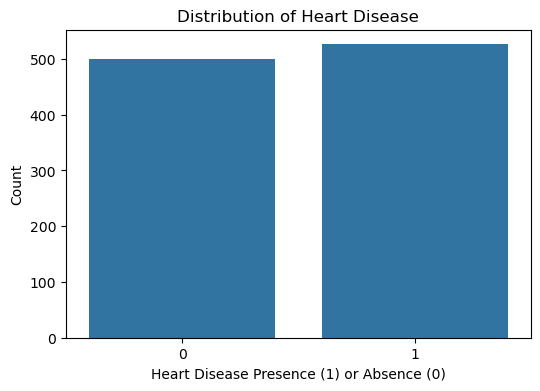

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease Presence (1) or Absence (0)')
plt.ylabel('Count')
plt.show()

Missing values in each column:
 age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
cp_1         0
cp_2         0
cp_3         0
restecg_1    0
restecg_2    0
slope_1      0
slope_2      0
thal_1       0
thal_2       0
thal_3       0
dtype: int64
Confusion Matrix:
 [[102   0]
 [  0 103]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



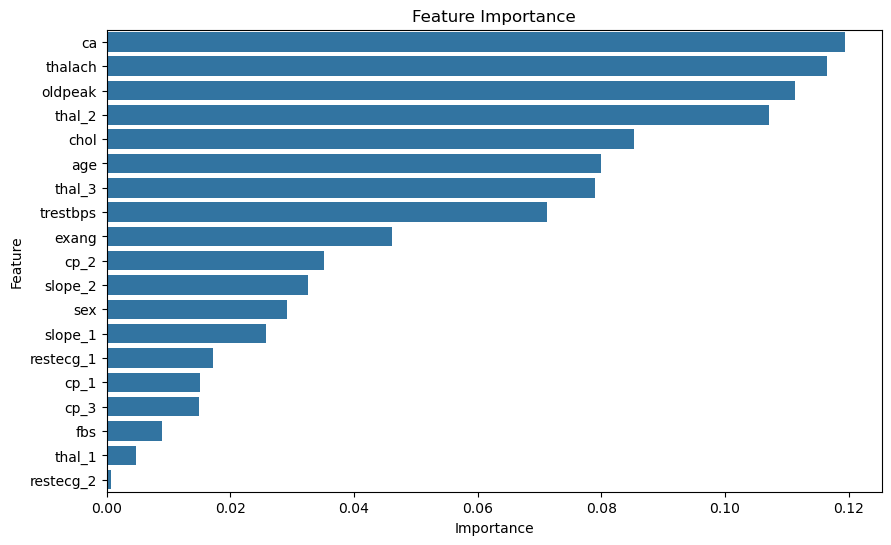

In [ ]:
# Preprocess the data:
#   Handle missing values
#   Encode categorical variables
#   Scale features if needed

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df = df.dropna()  # Simple approach: drop rows with missing values

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

# Split the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)  

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize feature importance
importances = model.feature_importances_
feature_names = X.columns       
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()





<!-- Apply K-Means clustering:
Use the Elbow Method to choose k
Evaluate clusters with Silhouette Score
Visualize clusters in 2D (PCA recommended) -->

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

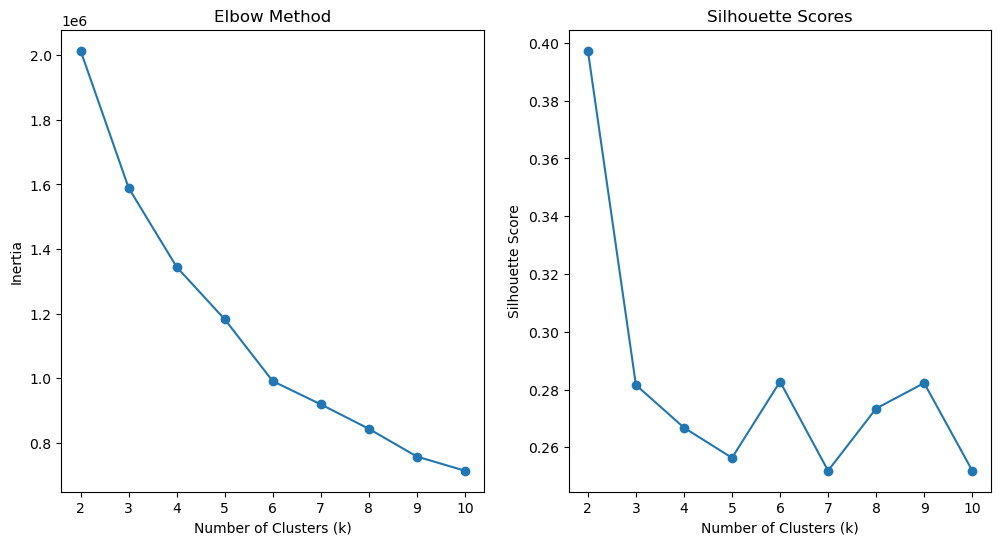

Best number of clusters (k): 2


c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the best k based on the plots
best_k = k_range[np.argmax(silhouette_scores)]
print("Best number of clusters (k):", best_k)

# Fit the KMeans model with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)

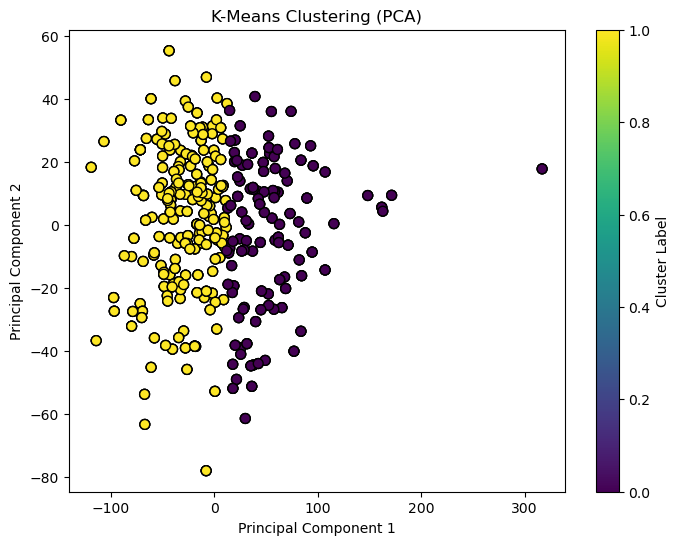

In [9]:
# visualize the clusters using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [10]:
# Compare supervised vs unsupervised insights.

supervised_importances = feature_importance_df
unsupervised_importances = pd.DataFrame({'Feature': X.columns, 'Importance': kmeans.cluster_centers_.mean(axis=0)})
print("Supervised Feature Importances:\n", supervised_importances)
print("Unsupervised Feature Importances:\n", unsupervised_importances)  


Supervised Feature Importances:
       Feature  Importance
8          ca    0.119396
5     thalach    0.116458
7     oldpeak    0.111266
17     thal_2    0.107089
3        chol    0.085349
0         age    0.079968
18     thal_3    0.078963
2    trestbps    0.071200
6       exang    0.046140
10       cp_2    0.035096
15    slope_2    0.032522
1         sex    0.029181
14    slope_1    0.025693
12  restecg_1    0.017230
9        cp_1    0.015060
11       cp_3    0.014924
4         fbs    0.008967
16     thal_1    0.004770
13  restecg_2    0.000728
Unsupervised Feature Importances:
       Feature  Importance
0         age   54.952383
1         sex    0.673045
2    trestbps  132.345327
3        chol  257.568754
4         fbs    0.147957
5     thalach  148.227904
6       exang    0.352734
7     oldpeak    1.100583
8          ca    0.779998
9        cp_1    0.164524
10       cp_2    0.263833
11       cp_3    0.072302
12  restecg_1    0.479214
13  restecg_2    0.016154
14    slope_1    0.478

In [11]:
differences = supervised_importances.merge(unsupervised_importances, on='Feature', suffixes=('_Supervised', '_Unsupervised'))
differences['Difference'] = differences['Importance_Supervised'] - differences['Importance_Unsupervised']
differences = differences.sort_values(by='Difference', key=abs, ascending=False)
differences

,Feature,Importance_Supervised,Importance_Unsupervised,Difference
4,chol,0.085349,257.568754,-257.483405
1,thalach,0.116458,148.227904,-148.111446
7,trestbps,0.071200,132.345327,-132.274127
5,age,0.079968,54.952383,-54.872415
2,oldpeak,0.111266,1.100583,-0.989317
0,ca,0.119396,0.779998,-0.660602
11,sex,0.029181,0.673045,-0.643865
13,restecg_1,0.017230,0.479214,-0.461984
12,slope_1,0.025693,0.478482,-0.452788
3,thal_2,0.107089,0.528162,-0.421073


Text(0, 0.5, 'Importance Difference')

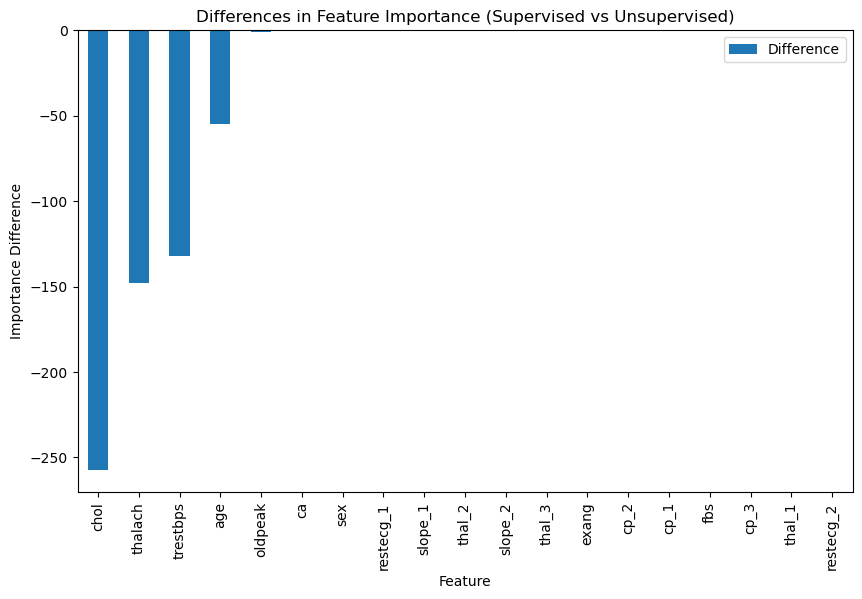

In [13]:
differences_graph = differences.plot(kind='bar', x='Feature', y='Difference', figsize=(10,6), title='Differences in Feature Importance (Supervised vs Unsupervised)')
plt.ylabel('Importance Difference') 
